<a href="https://www.kaggle.com/code/uouo882002/phishing?scriptVersionId=196094276" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-url/PhiUSIIL_Phishing_URL_Dataset.csv


# load the data 

In [2]:

# Load the dataset
file_path = '/kaggle/input/phishing-url/PhiUSIIL_Phishing_URL_Dataset.csv'
data = pd.read_csv(file_path)
data





,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


# Discovering Data Insights

In [3]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(data.info(), "\n")


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 

In [4]:
# Display the first few rows of the dataset (head)
print("Head of the dataset:")
print(data.head(), "\n")




Head of the dataset:
     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.0

In [5]:
# Display the last few rows of the dataset (tail)
print("Tail of the dataset:")
print(data.tail(), "\n")



Tail of the dataset:
           FILENAME                                                URL  \
235790   660997.txt                     https://www.skincareliving.com   
235791    77185.txt                      https://www.winchester.gov.uk   
235792   622132.txt                    https://www.nononsensedesign.be   
235793  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
235794   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
235790         29                           www.skincareliving.com   
235791         28                            www.winchester.gov.uk   
235792         30                          www.nononsensedesign.be   
235793         55  patient-cell-40f5.updatedlogmylogin.workers.dev   
235794         33                       www.alternativefinland.com   

        DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
235790            22           0  com          100.0

In [6]:
# Display the column names in the DataFrame
print(data.columns)


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [7]:
# Display the number of rows and columns in the dataset
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}\n")

Number of rows: 235795
Number of columns: 56



In [8]:
# Count the number of phishing and non-phishing rows
phishing_count = data[data['label'] == 0].shape[0]
non_phishing_count = data[data['label'] == 1].shape[0]

print(f"Number of phishing rows: {phishing_count}")
print(f"Number of non-phishing rows: {non_phishing_count}\n")


Number of phishing rows: 100945
Number of non-phishing rows: 134850



In [9]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe(), "\n")


Summary statistics for numerical columns:
           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628     

In [10]:
# Checking for missing values
print("Checking for missing values in the dataset:")
missing_values = data.isnull().sum()

# If there are no missing values, explicitly state that
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.\n")
else:
    print(missing_values[missing_values > 0], "\n")


Checking for missing values in the dataset:
There are no missing values in the dataset.



In [11]:
# Checking for missing values
print("Checking for missing values in the dataset:")
missing_values = data.isnull().sum()

# Display missing values for all columns, including those with zero missing values
print(missing_values, "\n")


Checking for missing values in the dataset:
FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                       

In [12]:
# Checking for duplicates in the dataset
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [13]:
# Check for infinite values in URLLength
inf_values = data['URLLength'].isin([float('inf'), float('-inf')]).sum()
print(f"Number of infinite values in URLLength: {inf_values}")


Number of infinite values in URLLength: 0


# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


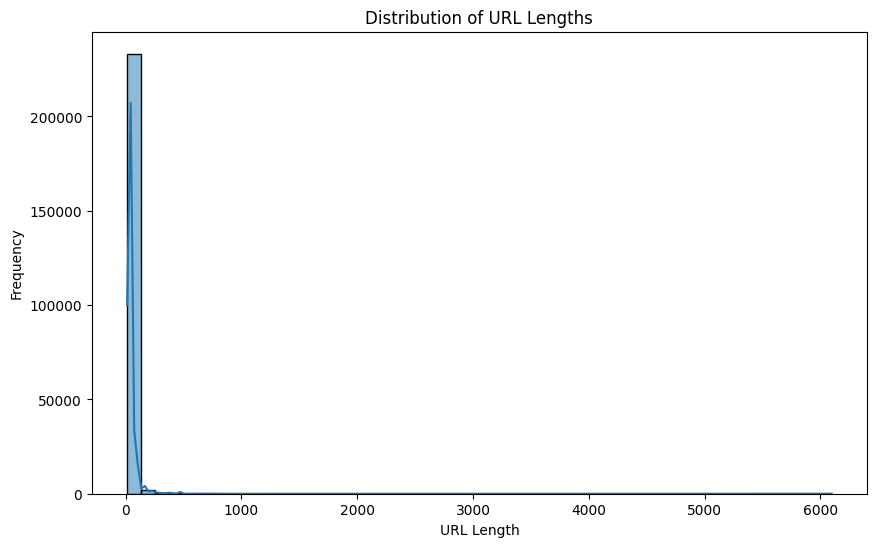

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of URL lengths after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(data['URLLength'], bins=50, kde=True)
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()


This histogram shows that while most URLs in your dataset are short, there are a few very long URLs that may require special consideration during analysis.

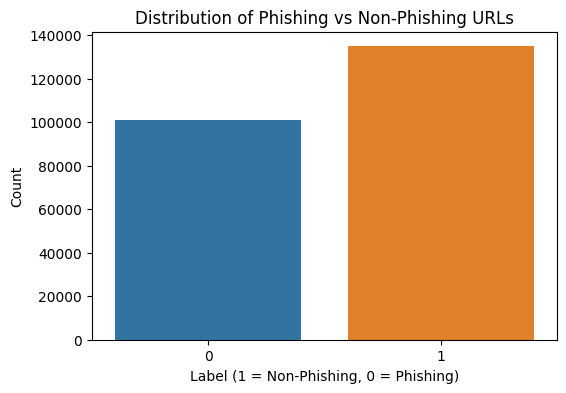

In [15]:
# Check the distribution of the target variable (phishing vs non-phishing)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Phishing vs Non-Phishing URLs')
plt.xlabel('Label (1 = Non-Phishing, 0 = Phishing)')
plt.ylabel('Count')
plt.show()


The dataset has a slight class imbalance, with less phishing examples than non-phishing ones. While this is not a severe imbalance, it could still influence model performance.

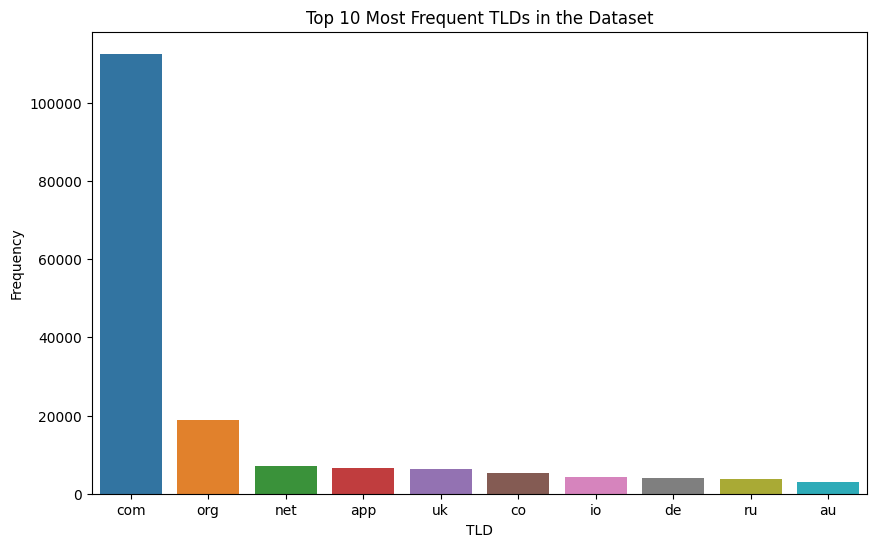

In [16]:
# Check the distribution of the top-level domains (TLD)
plt.figure(figsize=(10, 6))
top_tlds = data['TLD'].value_counts().head(10)
sns.barplot(x=top_tlds.index, y=top_tlds.values)
plt.title('Top 10 Most Frequent TLDs in the Dataset')
plt.xlabel('TLD')
plt.ylabel('Frequency')
plt.show()


The .com TLD is by far the most common in the dataset . with a frequency that significantly exceeds the other TLDs. This is not surprising as .com is the most popular TLD globally, often used by legitimate businesses as well as by phishing attackers.The other TLDs like .org, .net, and .app are also relatively common, though they occur far less frequently than .com.
TLDs like .uk, .co, .io, .de, .ru, and .au are present but are much less frequent.

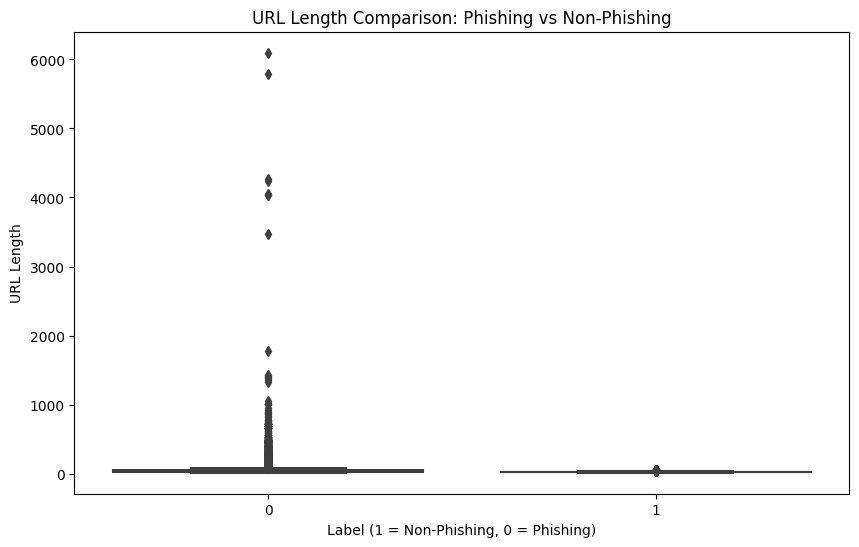

In [17]:
# Explore the relationship between URL length and whether it's phishing
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='URLLength', data=data)
plt.title('URL Length Comparison: Phishing vs Non-Phishing')
plt.xlabel('Label (1 = Non-Phishing, 0 = Phishing)')
plt.ylabel('URL Length')
plt.show()

Phishing URLs tend to have shorter lengths compared to non-phishing URLs, with fewer extreme outliers.
The IQR for phishing URLs is smaller and the median length is also shorter, indicating that phishing URLs are generally more consistent in length.
There are several outliers in the non-phishing URLs category, with some URLs being significantly longer than the rest. Phishing URLs, on the other hand, have fewer extreme outliers, suggesting that they tend to avoid very long URLs, possibly to maintain the appearance of legitimacy. so  Shorter URLs might be more common among phishing attempts, while extremely long URLs could indicate legitimate use cases.

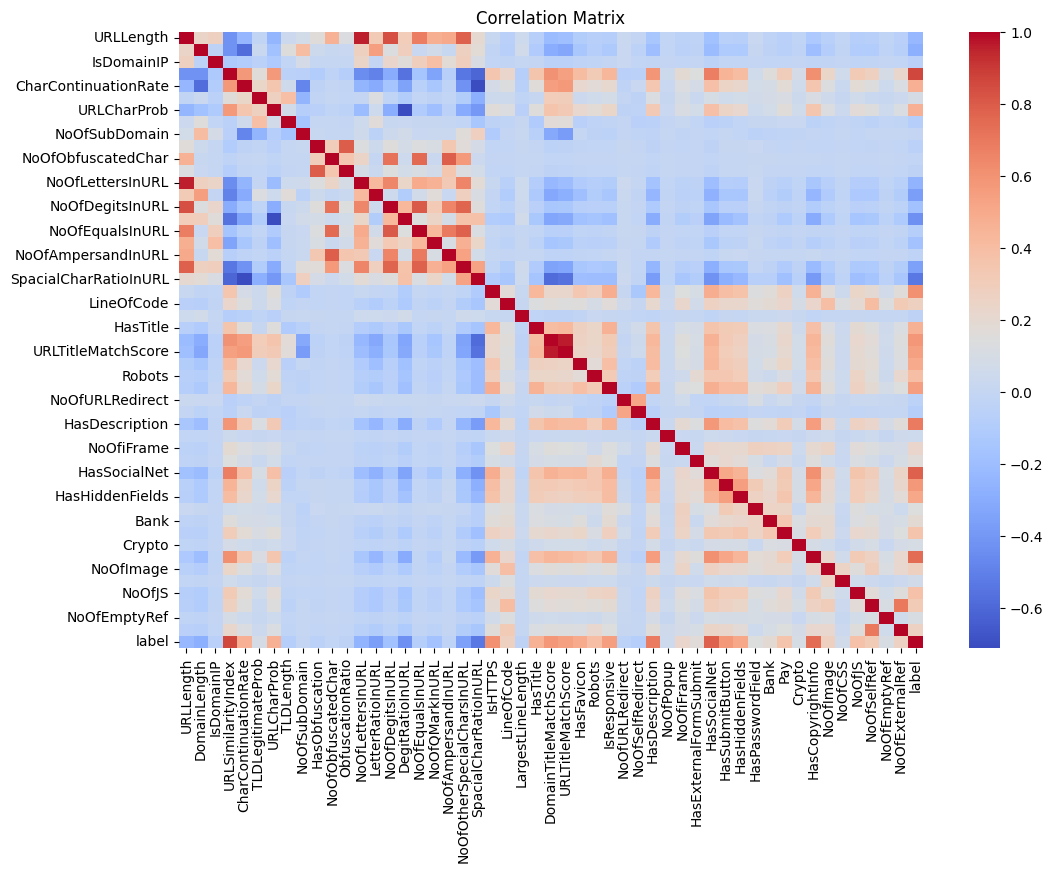

In [18]:
# Select only the numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


some features related to the content of URLs (like NoOfDigitsInURL and NoOfLettersInURL) might be positively correlated because they are both aspects of the URL's structure.
HasHTTPS is negatively correlated with a feature like NoOfRedirects, this might suggest that more secure URLs tend to have fewer redirects.
URLLength shows a moderate correlation with label, this suggests that the length of a URL could be a significant factor in determining whether it's phishing or not.



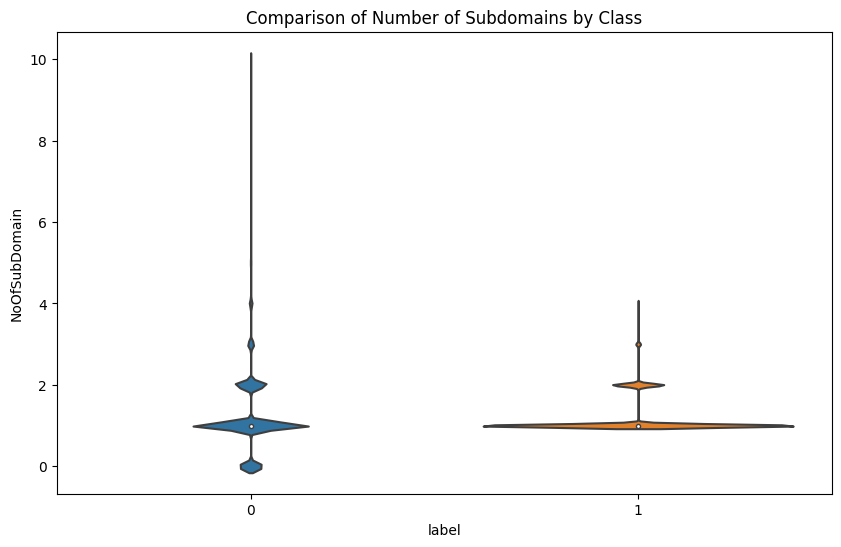

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='NoOfSubDomain', data=data)
plt.title('Comparison of Number of Subdomains by Class')
plt.show()


##  preprocessing 

there are no missing values or duplicate rows, then those preprocessing steps (handling missing values and removing duplicates) are not necessary.

###  Importance of Features for Phishing Detection

Phishing detection relies on key features of URLs and web content that indicate suspicious behavior:

1. **URL Length & Domain**: Longer URLs and domains often indicate obfuscation and deception, typical in phishing attacks.
2. **URL Composition**: Use of IP addresses instead of domains and similarity to legitimate URLs are common in phishing attempts.
3. **Obfuscation**: High levels of obfuscation, such as encoded characters and special symbols, are often used to disguise phishing URLs.
4. **Security Features**: Lack of HTTPS or external form submissions are red flags, as phishing sites tend to bypass security protocols.
5. **Web Content**: Minimal web elements like missing images, scripts, and titles indicate a quickly assembled phishing site.
6. **Target-Specific Terms**: Keywords related to finance (bank, pay, crypto) often signal phishing targeting sensitive data.

Together, these features help detect phishing sites by identifying unusual patterns that deviate from legitimate websites.

so i will drop columns except
* URLLength
* DomainLength
* IsDomainIP
* URLSimilarityIndex
* TLDLegitimateProb
* HasObfuscation
* ObfuscationRatio
* IsHTTPS
* HasExternalFormSubmit
* NoOfPopup
* NoOfURLRedirect
* label

In [20]:
# Dropping all columns except the specified ones
columns_to_keep = ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
                   'TLDLegitimateProb', 'HasObfuscation', 'ObfuscationRatio',
                   'IsHTTPS', 'HasExternalFormSubmit', 'NoOfPopup', 'NoOfURLRedirect','label']

data_filtered = data[columns_to_keep]

data_filtered

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,TLDLegitimateProb,HasObfuscation,ObfuscationRatio,IsHTTPS,HasExternalFormSubmit,NoOfPopup,NoOfURLRedirect,label
0,31,24,0,100.000000,0.522907,0,0.0,1,0,0,0,1
1,23,16,0,100.000000,0.032650,0,0.0,1,0,0,0,1
2,29,22,0,100.000000,0.028555,0,0.0,1,0,0,0,1
3,26,19,0,100.000000,0.522907,0,0.0,1,0,1,0,1
4,33,26,0,100.000000,0.079963,0,0.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,0.522907,0,0.0,1,0,0,0,1
235791,28,21,0,100.000000,0.028555,0,0.0,1,0,0,0,1
235792,30,23,0,100.000000,0.003319,0,0.0,1,0,0,0,1
235793,55,47,0,28.157537,0.000961,0,0.0,1,0,0,0,0


**dimensionally reduction**

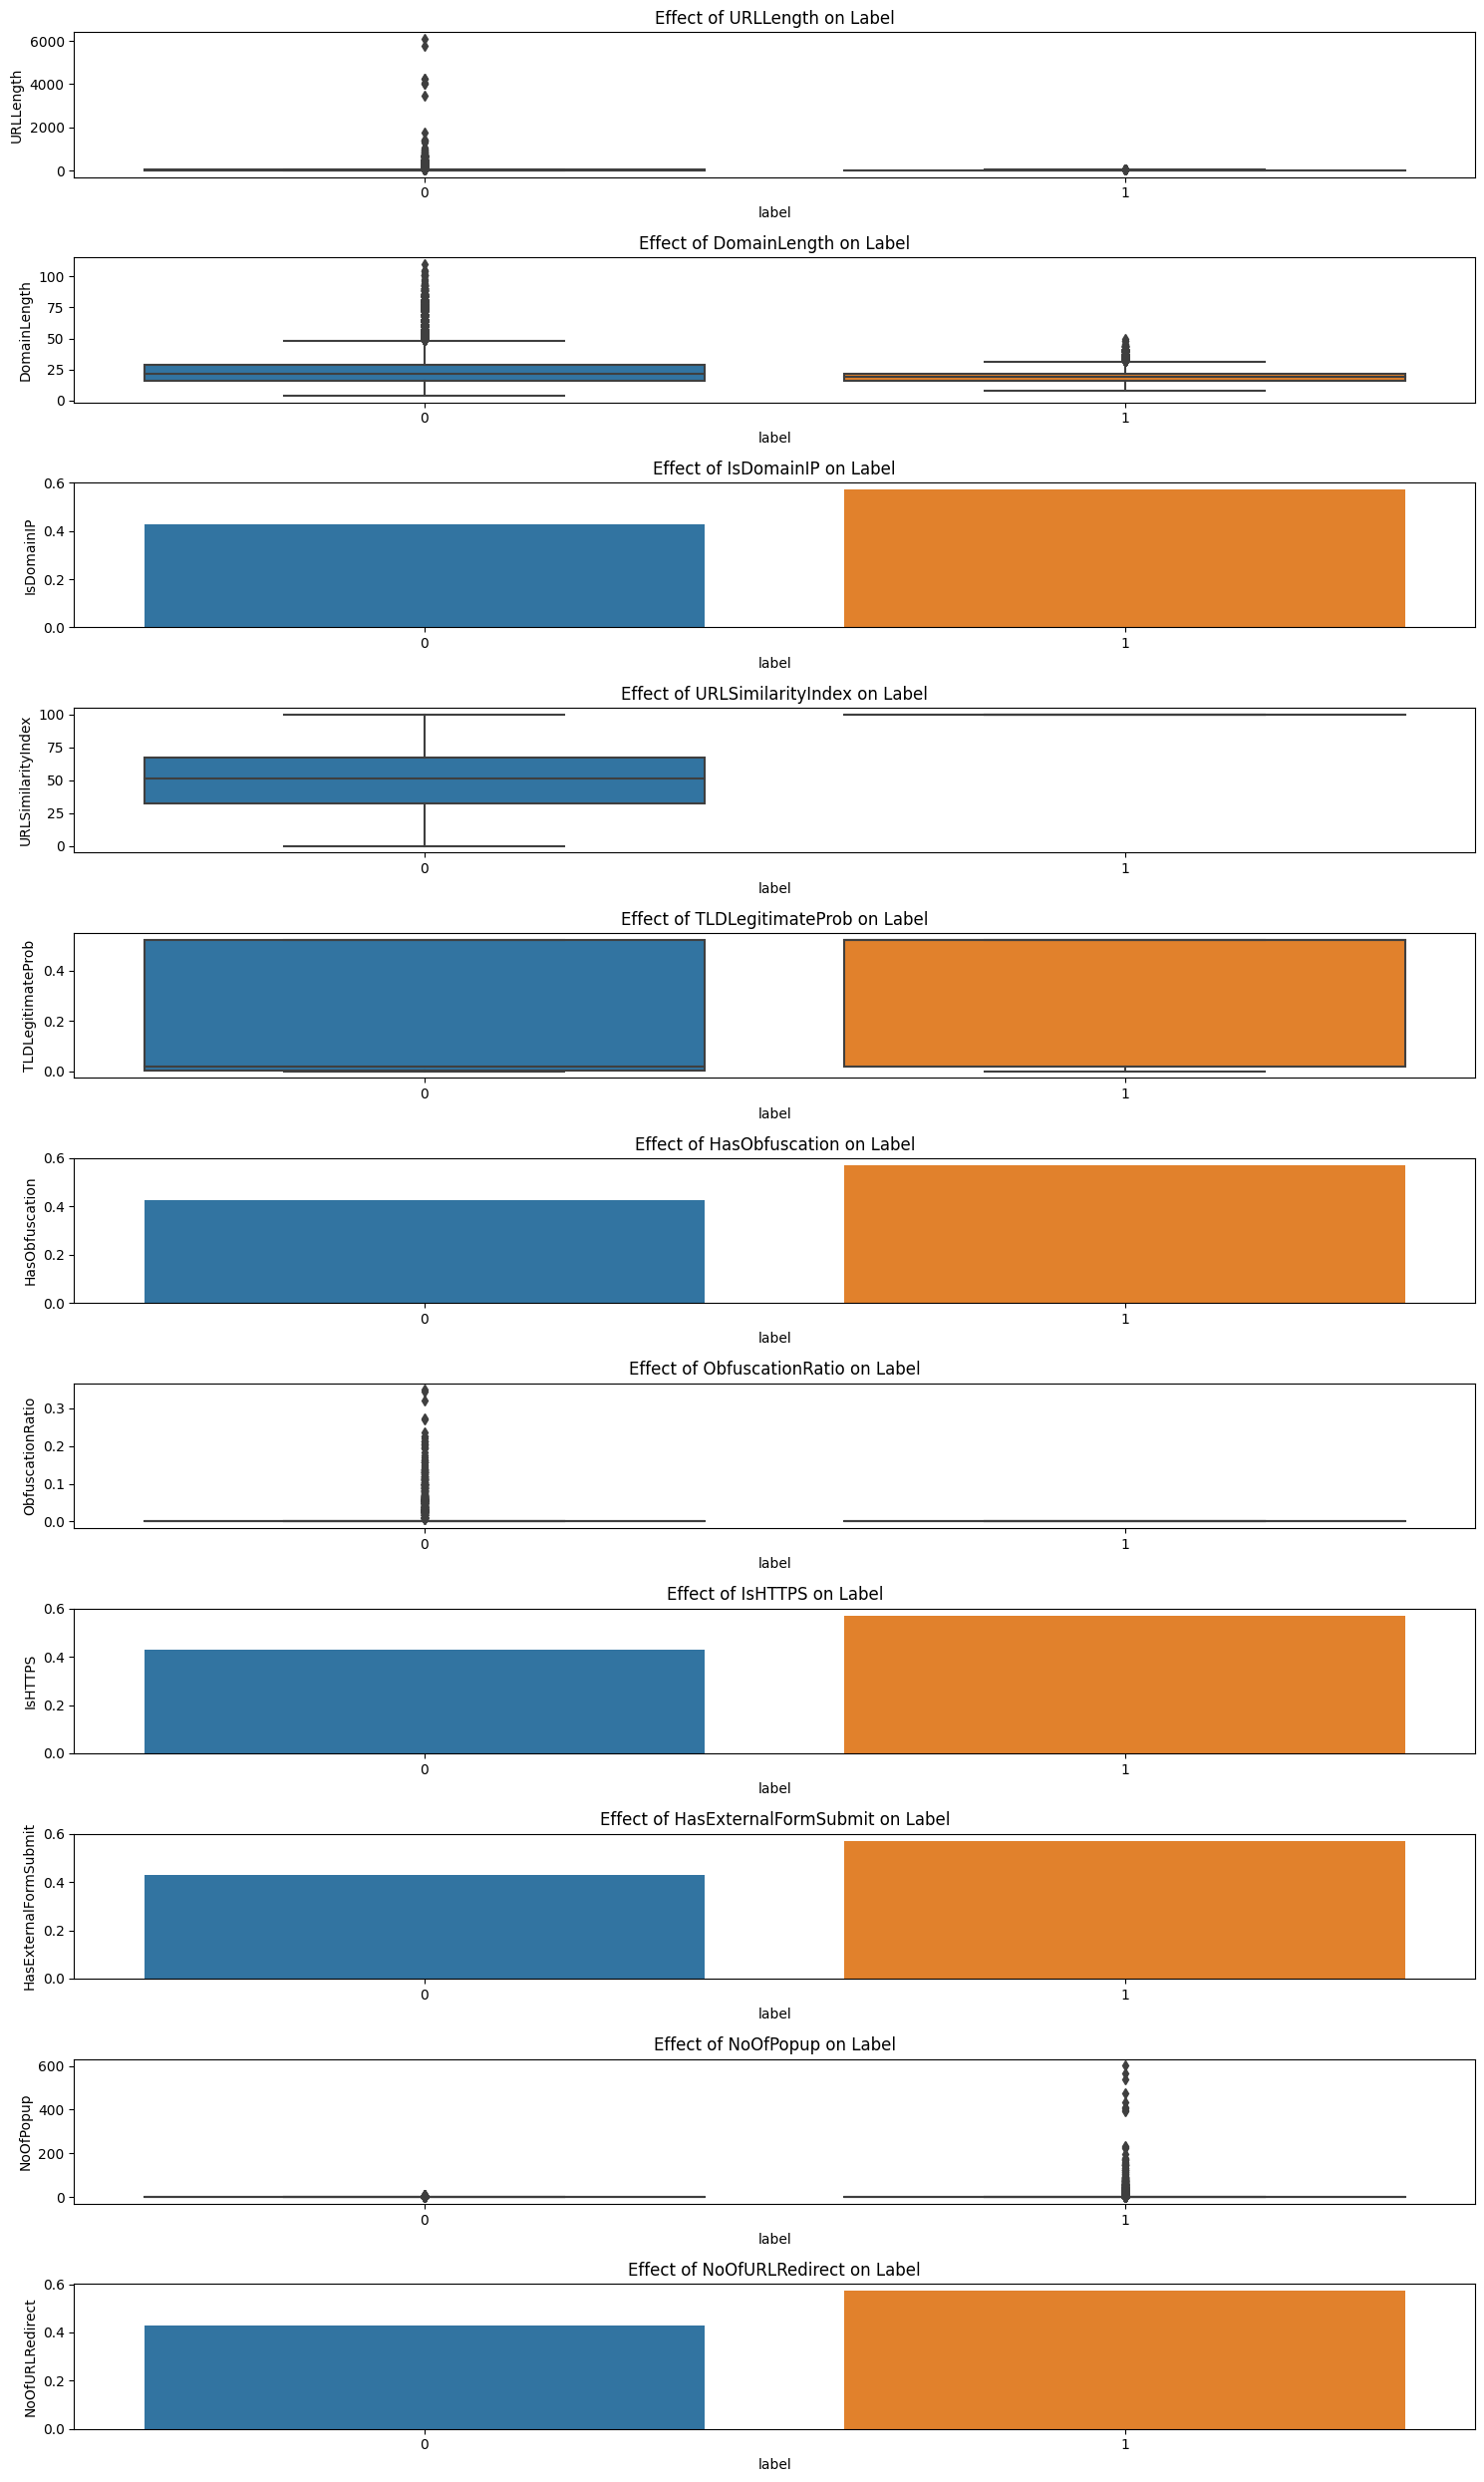

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize
features = ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
            'TLDLegitimateProb', 'HasObfuscation', 'ObfuscationRatio',
            'IsHTTPS', 'HasExternalFormSubmit', 'NoOfPopup', 'NoOfURLRedirect']

# Set up the figure for visualizing each feature relative to the label
plt.figure(figsize=(15, 25))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    if data_filtered[feature].nunique() > 2:  # Continuous features
        sns.boxplot(x='label', y=feature, data=data_filtered)
    else:  # Binary or categorical features
        sns.barplot(x='label', y=feature, data=data_filtered, estimator=lambda x: len(x) / len(data_filtered))
    plt.title(f'Effect of {feature} on Label')

plt.tight_layout()
plt.show()


* Features like IsDomainIP, HasObfuscation, IsHTTPS, and HasExternalFormSubmit clearly show that they are heavily correlated with phishing (label 0).
* Continuous features such as URLLength, DomainLength, and ObfuscationRatio show differences in their distribution for phishing vs non-phishing URLs.
* The plots reveal clear patterns: phishing URLs tend to be longer, more obfuscated, and have characteristics such as IP addresses in the domain, lack of HTTPS, and frequent redirects or popups.

Based on the visualizations, the following features seem to have little or no significant difference between the two label classes (0 = Non-Phishing, 1 = Phishing), meaning they might not be highly predictive for phishing detection:

* URLSimilarityIndex – Shows a narrow range and little variation across both classes.
* ObfuscationRatio – Appears to have very few outliers, and the overall distribution seems nearly identical for both labels.
* NoOfPopup – The distribution shows very minimal difference between the two label classes.

**Feature Selection**

In [22]:
# Dropping the less effective features
columns_to_keep = ['URLLength', 'DomainLength', 'IsDomainIP', 'TLDLegitimateProb', 
                   'HasObfuscation', 'IsHTTPS', 'HasExternalFormSubmit', 'NoOfURLRedirect', 'label']

data_reduced = data_filtered[columns_to_keep]

data_reduced

,URLLength,DomainLength,IsDomainIP,TLDLegitimateProb,HasObfuscation,IsHTTPS,HasExternalFormSubmit,NoOfURLRedirect,label
0,31,24,0,0.522907,0,1,0,0,1
1,23,16,0,0.032650,0,1,0,0,1
2,29,22,0,0.028555,0,1,0,0,1
3,26,19,0,0.522907,0,1,0,0,1
4,33,26,0,0.079963,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
235790,29,22,0,0.522907,0,1,0,0,1
235791,28,21,0,0.028555,0,1,0,0,1
235792,30,23,0,0.003319,0,1,0,0,1
235793,55,47,0,0.000961,0,1,0,0,0


**Standardization/Normalization**

In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming these are your numerical features
numerical_columns = ['URLLength', 'DomainLength', 'TLDLegitimateProb']
scaler = StandardScaler()

data_reduced.loc[:, numerical_columns] = scaler.fit_transform(data_reduced[numerical_columns])


/tmp/ipykernel_36/1417191234.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08648617 -0.28012483 -0.13489583 ... -0.110691    0.4944298
 -0.03807651]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_reduced.loc[:, numerical_columns] = scaler.fit_transform(data_reduced[numerical_columns])
/tmp/ipykernel_36/1417191234.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.27643609 -0.59780692  0.05787534 ...  0.16715571  2.78988473
  0.49499684]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_reduced.loc[:, numerical_columns] = scaler.fit_transform(data_reduced[numerical_columns])


**One-Hot Encoding for Categorical Variables**

In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Categorical columns that need encoding
categorical_columns = ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasExternalFormSubmit']

# Initialize OneHotEncoder with the proper argument
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_cat = encoder.fit_transform(data_reduced[categorical_columns])

# Convert back to DataFrame and merge with numerical features
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))
data_preprocessed = pd.concat([data_reduced.drop(categorical_columns, axis=1), encoded_cat_df], axis=1)


data_preprocessed



,URLLength,DomainLength,TLDLegitimateProb,NoOfURLRedirect,label,IsDomainIP_1,HasObfuscation_1,IsHTTPS_1,HasExternalFormSubmit_1
0,-0.086486,0.276436,1.043145,0,1,0.0,0.0,1.0,0.0
1,-0.280125,-0.597807,-0.905197,0,1,0.0,0.0,1.0,0.0
2,-0.134896,0.057875,-0.921472,0,1,0.0,0.0,1.0,0.0
3,-0.207510,-0.269966,1.043145,0,1,0.0,0.0,1.0,0.0
4,-0.038077,0.494997,-0.717171,1,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
235790,-0.134896,0.057875,1.043145,0,1,0.0,0.0,1.0,0.0
235791,-0.159101,-0.051405,-0.921472,0,1,0.0,0.0,1.0,0.0
235792,-0.110691,0.167156,-1.021764,0,1,0.0,0.0,1.0,0.0
235793,0.494430,2.789885,-1.031133,0,0,0.0,0.0,1.0,0.0


In [25]:
# Check for duplicate column names
print(data_preprocessed.columns)



Index(['URLLength', 'DomainLength', 'TLDLegitimateProb', 'NoOfURLRedirect',
       'label', 'IsDomainIP_1', 'HasObfuscation_1', 'IsHTTPS_1',
       'HasExternalFormSubmit_1'],
      dtype='object')


In [26]:
# Check how many times each column appears
print(data_preprocessed.columns.value_counts())


URLLength                  1
DomainLength               1
TLDLegitimateProb          1
NoOfURLRedirect            1
label                      1
IsDomainIP_1               1
HasObfuscation_1           1
IsHTTPS_1                  1
HasExternalFormSubmit_1    1
Name: count, dtype: int64


**Feature Engineering**

In [27]:

# Creating an interaction feature between URLLength and DomainLength
data_preprocessed['URL_Domain_Interaction'] = data_preprocessed['URLLength'] * data_preprocessed['DomainLength']
data_preprocessed

,URLLength,DomainLength,TLDLegitimateProb,NoOfURLRedirect,label,IsDomainIP_1,HasObfuscation_1,IsHTTPS_1,HasExternalFormSubmit_1,URL_Domain_Interaction
0,-0.086486,0.276436,1.043145,0,1,0.0,0.0,1.0,0.0,-0.023908
1,-0.280125,-0.597807,-0.905197,0,1,0.0,0.0,1.0,0.0,0.167461
2,-0.134896,0.057875,-0.921472,0,1,0.0,0.0,1.0,0.0,-0.007807
3,-0.207510,-0.269966,1.043145,0,1,0.0,0.0,1.0,0.0,0.056021
4,-0.038077,0.494997,-0.717171,1,1,0.0,0.0,1.0,0.0,-0.018848
...,...,...,...,...,...,...,...,...,...,...
235790,-0.134896,0.057875,1.043145,0,1,0.0,0.0,1.0,0.0,-0.007807
235791,-0.159101,-0.051405,-0.921472,0,1,0.0,0.0,1.0,0.0,0.008179
235792,-0.110691,0.167156,-1.021764,0,1,0.0,0.0,1.0,0.0,-0.018503
235793,0.494430,2.789885,-1.031133,0,0,0.0,0.0,1.0,0.0,1.379402


In [28]:

# Dropping the original features 'URLLength' and 'DomainLength'
data_preprocessed = data_preprocessed.drop(['URLLength', 'DomainLength'], axis=1)
data_preprocessed

,TLDLegitimateProb,NoOfURLRedirect,label,IsDomainIP_1,HasObfuscation_1,IsHTTPS_1,HasExternalFormSubmit_1,URL_Domain_Interaction
0,1.043145,0,1,0.0,0.0,1.0,0.0,-0.023908
1,-0.905197,0,1,0.0,0.0,1.0,0.0,0.167461
2,-0.921472,0,1,0.0,0.0,1.0,0.0,-0.007807
3,1.043145,0,1,0.0,0.0,1.0,0.0,0.056021
4,-0.717171,1,1,0.0,0.0,1.0,0.0,-0.018848
...,...,...,...,...,...,...,...,...
235790,1.043145,0,1,0.0,0.0,1.0,0.0,-0.007807
235791,-0.921472,0,1,0.0,0.0,1.0,0.0,0.008179
235792,-1.021764,0,1,0.0,0.0,1.0,0.0,-0.018503
235793,-1.031133,0,0,0.0,0.0,1.0,0.0,1.379402


**Train-Test Split**

In [29]:
from sklearn.model_selection import train_test_split

X = data_preprocessed.drop('label', axis=1)
y = data_preprocessed['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBClassifier

In [30]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Define the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1],
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best hyperparameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

# Optional: Print feature importances from the XGBoost model
importance_df = pd.DataFrame({'Feature': X_train.columns, 
                              'Importance': best_model.feature_importances_})
print(importance_df.sort_values(by='Importance', ascending=False))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     20124
           1       0.98      1.00      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159

                   Feature  Importance
4                IsHTTPS_1    0.803844
6   URL_Domain_Interaction    0.114335
0        TLDLegitimateProb    0.040001
5  HasExternalFormSubmit_1    0.035105
3         HasObfuscation_1    0.004070
2             IsDomainIP_1    0.001330
1          NoOfURLRedirect    0.001315


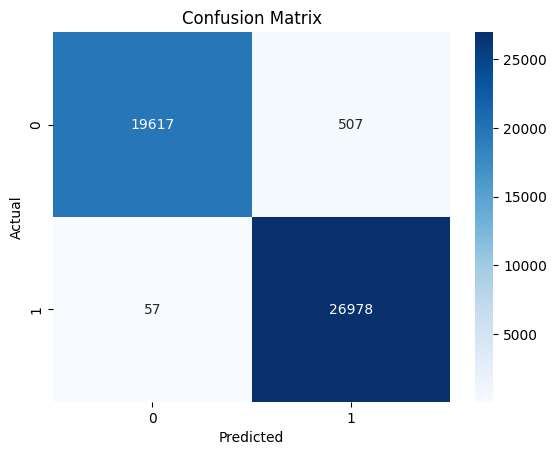

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


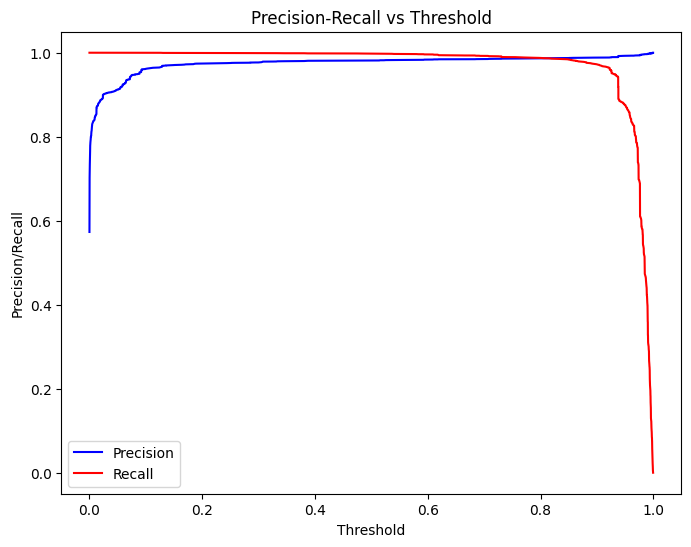

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for class 1 (phishing)
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b-', label="Precision")
plt.plot(thresholds, recall[:-1], 'r-', label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()


**define suitable threshold for your model based on the Precision-Recall trade-off**

In [33]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Get prediction probabilities from your model
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the optimal threshold with the best F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.5329803228378296


In [34]:
# Apply the optimal threshold to get new predictions
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model again using the new predictions
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report with Optimal Threshold")
print(classification_report(y_test, y_pred_optimal))



Classification Report with Optimal Threshold
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20124
           1       0.98      1.00      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



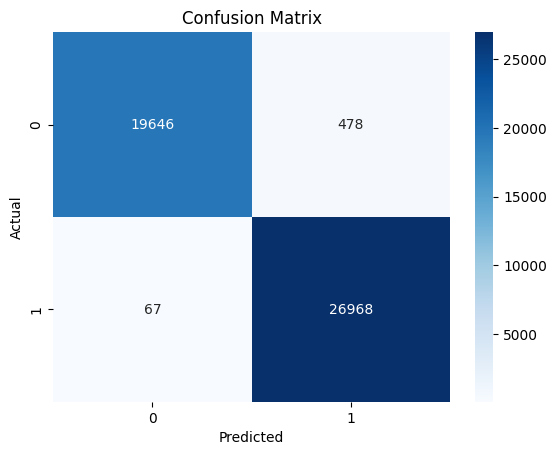

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
